In [12]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

# Competition Overview

### Explore train data

In [2]:
# Read train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

# Look at the head() of the data
print(train.head())

Train shape: (15500, 5)
       id        date  store  item  sales
0  100000  2017-12-01      1     1     19
1  100001  2017-12-02      1     1     16
2  100002  2017-12-03      1     1     31
3  100003  2017-12-04      1     1      7
4  100004  2017-12-05      1     1     20


### Explore test data

In [3]:
# Part 1
# Read the test data
test = pd.read_csv('demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())


# Part 2
# Read the sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

# Look at the head() of the sample submission
print(sample_submission.head())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']
   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


# Prepare your first submission

### Determine a problem type
Before building a model, you should determine the problem type you are addressing. The goal of this exercise is to look at the distribution of the target variable, and select the correct problem type you will be building a model for.

The train DataFrame is already available in your workspace. It has the target variable column called "sales". 

Text(0.5, 1.0, 'histogram of sales')

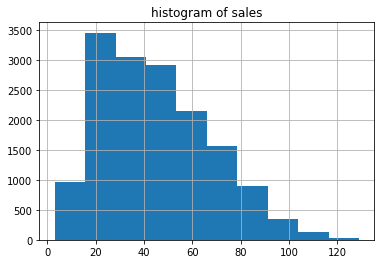

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
train.sales.hist(ax = ax)
ax.set_title('histogram of sales')

Regression model. The sales variable is continuous, so you're solving a regression problem.

### Train a simple model

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Read the train data
train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Create a Random Forest object
rf = RandomForestRegressor()

# Train a model
rf.fit(X = train[['store', 'item']], y = train['sales'])

RandomForestRegressor()

### Prepare a submission

In [6]:
# Part 1
# Read test and sample submission data
test = pd.read_csv('demand_forecasting_test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Show the head() of the sample_submission
print(sample_submission.head())


# Part 2
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index = False)

   id  sales
0   0     52
1   1     52
2   2     52
3   3     52
4   4     52


# Public vs Private leaderboard

### What model is overfitting?
Let's say you've trained 4 different models and calculated a metric for both train and validation data sets. For example, the metric is Mean Squared Error (the lower its value the better). Train and validation metrics for all the models are presented in the table below.
<br>
Please, select the model that overfits to train data.<br>
<br>
Model 	| Train MSE | Validation MSE <br>
Model 1 |	2.35 	| 2.46 <br>
Model 2 |	2.20 	| 2.15 <br>
Model 3 |	2.10 	| 2.14 <br>
Model 4 |	1.90 	| 2.35 <br>

<b> Answer: Model 4 which has considerably lower train MSE compared to other models. However, validation MSE started growing again. </b>

### Train XGBoost models

In [ ]:
# Part 1
# Set the maximum depth to 2.
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data = train[['store', 'item']],
                     label = train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params = params, dtrain = dtrain)

# Part 2
# Now, set the maximum depth to 8. 
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data = train[['store', 'item']],
                     label = train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params = params, dtrain = dtrain)

# Part 3
# Finally, set the maximum depth to 15.
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data = train[['store', 'item']],
                     label = train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params = params, dtrain = dtrain)

### Explore overfitting XGBoost

In [14]:
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(data = train[['store', 'item']])
dtest = xgb.DMatrix(data = test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(train['sales'], train_pred)                  
    mse_test = mean_squared_error(test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}'.format(mse_train, mse_test))

MSE Train: 331.064. MSE Test: 249.821
MSE Train: 112.057. MSE Test: 30.746
MSE Train: 84.952. MSE Test: 3.543
